In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xlrd
import os
import seaborn as sns
import xgboost
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,\
ExtraTreesClassifier, VotingClassifier, StackingRegressor
from sklearn.metrics import r2_score, accuracy_score, precision_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier

In [2]:
# tweets = pd.read_csv("Data/tweets.csv", encoding = 'unicode_escape')
df = pd.read_csv("Data/tweets.csv", encoding = 'iso-8859-1')

In [3]:
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [4]:
# Rename column names
col_names = ['tweets','emotion_directed','sentiment']
df = df.set_axis(col_names, axis=1, inplace=False)

In [7]:
# Renaming sentiments to Negative, Positive, Neutral, and I can't tell.
for i in range(len(df.sentiment)):
    if df.sentiment[i] == 'Negative emotion':
        df["sentiment"][i] = "negative"
    elif df.sentiment[i] == 'Positive emotion':
        df["sentiment"][i] = "positive"
    elif df.sentiment[i] == 'No emotion toward brand or product':
        df['sentiment'][i] = 'neutral'

In [8]:
# Dropping I can't tell sentiments
df = df[df['sentiment'] != 'I can\'t tell']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8937 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweets            8936 non-null   object
 1   emotion_directed  3282 non-null   object
 2   sentiment         8937 non-null   object
dtypes: object(3)
memory usage: 279.3+ KB


In [10]:
df['sentiment'].value_counts()

neutral     5389
positive    2978
negative     570
Name: sentiment, dtype: int64

In [11]:
df = df[df['sentiment'] != 'I can\'t tell']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8937 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweets            8936 non-null   object
 1   emotion_directed  3282 non-null   object
 2   sentiment         8937 non-null   object
dtypes: object(3)
memory usage: 279.3+ KB


In [12]:
df['tweets'] = df['tweets'].astype('str') 

In [13]:
# Capital letter column function
def capital_letter_ratio(tweet):
    #Initialize count 
    capital_count = 0
    
    # Iterate through tweets for caps
    for c in tweet:
        if c.isupper():
            capital_count += 1
    return capital_count / len(tweet)

#Adds capital letter ratio column
df['caps_ratio'] = df['tweets'].apply(capital_letter_ratio)

In [14]:
# Exclamation column function
def exc_count(tweet):
    
    punctuation = '!'
    # Initialize count
    count = 0
    
    # Find punctuation
    for punc in punctuation:
        count += tweet.count(punc)
    return count

#Adds count column to the tweets
df['!_count'] = df['tweets'].apply(exc_count)

In [15]:
# Question mark column function
def que_count(tweet):
    
    punctuation = '?'
    # Initialize count
    count = 0
    
    # Find punctuation
    for punc in punctuation:
        count += tweet.count(punc)
    return count

#Adds count column to the tweets
df['?_count'] = df['tweets'].apply(que_count)

In [16]:
df.head()

,tweets,emotion_directed,sentiment,caps_ratio,!_count,?_count
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,negative,0.118110,1,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,positive,0.071942,0,1
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,positive,0.088608,0,0
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,negative,0.024390,0,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,positive,0.106870,0,0


<AxesSubplot:>

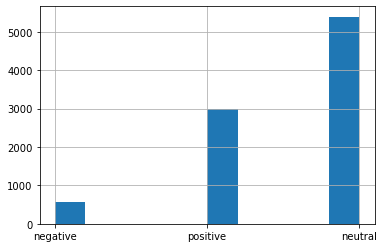

In [17]:
sns.barplot(x = )

In [18]:
high_que = df[df['?_count'] > 2]
high_exc = df[df['!_count'] > 2]

<AxesSubplot:>

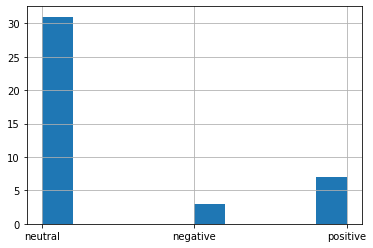

In [19]:
high_que['sentiment'].hist()

<AxesSubplot:>

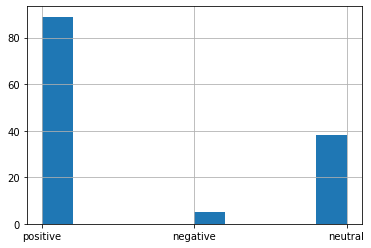

In [20]:
high_exc['sentiment'].hist()

In [22]:
# Separate tweets by sentiment
positive = df[df['sentiment'] == 'positive']
negative = df[df['sentiment'] == 'negative']
neutral = df[df['sentiment'] == 'neutral']

In [23]:
# Print average caps ratio for each sentiment
print(positive['caps_ratio'].mean())
print(negative['caps_ratio'].mean())
print(neutral['caps_ratio'].mean())

0.07532463308340873
0.06432151704731871
0.08188310308102806


In [24]:
def find_company_name_v2(text,emotion_at):
    
    '''
    Go through text ('tweet_text' column) and determine whether it is about apple or google and
    return either 'apple' or 'google' according to search.
    If cannot tell company id from text, check emotion_at ('emotion_in_tweet_is_directed_at'
    column) for comapy id. If cannot find company id return 'cannot tell'.
    '''
    
    revised_emotion_at = str(emotion_at).lower()
    
    
    revised_text = str(text).lower()
    
    apple = ['apple','iphone','ipad']
    google = ['google','android']
    
    apple_count = 0
    google_count = 0
    
    for a in apple:
        apple_count += sum(1 for _ in re.finditer(r'\b%s\b' % re.escape(a), revised_text))
        
    for g in google:
        google_count += sum(1 for _ in re.finditer(r'\b%s\b' % re.escape(g), revised_text))
    

    if apple_count > google_count:
        return 'apple'
    elif google_count > apple_count:
        return 'google'
    elif revised_emotion_at != 'nan' and revised_emotion_at != 'default':
        for idx, item in enumerate(revised_emotion_at.split()):
            if item in apple:
                return 'apple'
            elif item in google:
                return 'google'
            else:
                if idx == len(revised_emotion_at.split()): 
                    return 'cannot tell'
    else:
        return 'cannot tell'

In [26]:
# Create a new column called 'company_name' and find whether the tweet is about apple,
# google or cannot tell using function find_company_name
 
df['company_name'] = df.apply(
    lambda s: find_company_name_v2(s['tweets'],s['emotion_directed']),axis=1) 

df['company_name'].value_counts()

NameError: name 're' is not defined

In [ ]:
sns.barplot(x = ['Apple', 'Google', 'Neither'], 
            y = sentiments_df['company_name'].value_counts(), 
            palette = {"Apple": "b", "Google": "r", "Neither": "gray"})